#HEATMAPS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
papers = pd.read_csv("/content/3_table_1_with_abstracts.csv")
papers.head(5)

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article']
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃªncia F...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article']
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃ©o; Rahmaty, Marj...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article']
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃºria; Kaiser, Marcel; Brun...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article']
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article']


In [ ]:
# Define the classification function
def classify_labels(text):
    labels = []
    patterns = {
        "Trypanosoma": [
             r"(?i)Trypanosoma brucei brucei", r"(?i)Trypanosoma brucei", r"(?i)Trypanosoma cruzi",
            r"(?i)Trypanosoma congolense",  r"(?i)T. brucei rhodesiense", r"(?i)Trypanosoma brucei rhodesiense",
              r"(?i)Trypanosoma brucei gambisense", r"(?i)T. brucei gambisense", r"(?i)Trypanosoma spp.", r"(?i)Trypanosoma sp", r"(?i)T. cruzi",
             r"(?i)T. brucei", r"(?i)T. congolense", r"(?i)T. b. gambisense", r"(?i)T. b. rhodesiense", r"(?i)T. brucei rhodesiense",
              r"(?i)T. brucei brucei", r"(?i)T. b. brucei"
        ],
        "Leishmania": [
              r"(?i)Leishmania donovani",  r"(?i)L. amazonensis", r"(?i)L. infantum",  r"(?i)Leishmania amazonensis",
              r"(?i)Leishmania mexicana Mexicana",  r"(?i)Leishmania mexicana", r"(?i)Leishmania braziliensis",
              r"(?i)Leishmania enriettii",  r"(?i)Leishmania major",  r"(?i)Leishmania spp", r"(?i)Leishmania Tropica",
              r"(?i)Leishmania tropica",  r"(?i)Leishmania tarentolae",  r"(?i)L. chagasi", r"(?i)Leishmania chagasi",
              r"(?i)L. pifanoi",  r"(?i)Leishmania pifanoi", r"(?i)Leishmania sp", r"(?i)L. major", r"(?i)L. donovani", r"(?i)L. amazonensis",
              r"(?i)L. mexicana Mexicana", r"(?i)L. mexicana", r"(?i)L. braziliensis",  r"(?i)L. enriettii", r"(?i)Leishmania infantum"
        ],
        "Schistosoma": [
            r"(?i)Schistosoma mansoni", r"(?i)Schistosoma haematobium", r"(?i)S. japonicum", r"(?i)Schistosoma japonicum",
            r"(?i)Schistosoma spp", r"(?i)S. mansoni", r"(?i)S. haematobium", r"(?i)Schistosoma sp"
        ],
        "Toxoplasma": [
             r"(?i)Toxoplasma gondii", r"(?i)Toxoplasma spp", r"(?i)Toxoplasma spp.",  r"(?i)T. gondii",  r"(?i)Toxoplasma sp"
        ],
        "Onchocerca": [
             r"(?i)Onchocerca volvulus",  r"(?i)Onchocerca ochengi", r"(?i)Onchocerca spp", r"(?i)Onchocerca spp.", r"(?i)Onchocerca sp"
        ],
        "Echinococcus": [
             r"(?i)Echinococcus granulosus", r"(?i)E. granulosus",  r"(?i)Echinococcus multilocularis",  r"(?i)Ec. multilocularis",
              r"(?i)Echinococcus protoscoleces", r"(?i)Ec. protoscoleces", r"(?i)Echinococcus spp", r"(?i)Echinococcus sp"
        ],
        "Fasciola": [
             r"(?i)Fasciola spp", r"(?i)Fasciola gigantica", r"(?i)Fasciola hepatica", r"(?i)F. gigantica", r"(?i)F. hepatica", r"(?i)Fasciola sp"
        ],
        "Brugia": [
            r"(?i)Brugia pahangi", r"(?i)Brugia spp", r"(?i)Brugia spp.", r"(?i)B. pahangi", r"(?i)B. malayi", r"(?i)Brugia malayi", r"(?i)Brugia sp"
        ],
        "Taenia": [
            r"(?i)Taenia solium", r"(?i)Taenia spp.", r"(?i)T. solium", r"(?i)Taenia sp"
        ],
        "Trichuris": [
            r"(?i)Trichuris trichiura", r"(?i)T. trichiura", r"(?i)Trichuris spp", r"(?i)Trichuris spp.", r"(?i)Trichuris sp"
        ],
        "Ancylostoma": [
            r"(?i)Ancylostoma ceylanicum", r"(?i)A. ceylanicum", r"(?i)Ancylostoma spp", r"(?i)Ancylostoma spp.", r"(?i)Ancylostoma sp"
        ],
        "Ascaris": [
             r"(?i)Ascaris lumbricoides", r"(?i)A. lumbricoides", r"(?i)Ascaris spp", r"(?i)Ascaris spp.", r"(?i)Ascaris suum", r"(?i)Ascaris sp"
        ],
        "Tunga": [
             r"(?i)Tunga penetrans", r"(?i)T. penetrans", r"(?i)Tunga spp", r"(?i)Tunga spp.", r"(?i)Tunga sp"
        ],
        "Culex": [
              r"(?i)Culex spp", r"(?i)Culex spp.", r"(?i)Culex sp", r"(?i)Culex quinquefasciatus", r"(?i)C. quinquefasciatus", r"(?i)Culex antennatus",
              r"(?i)Cx. quinquefasciatus",  r"(?i)Cx. vishnui", r"(?i)Culex vishnui", r"(?i)C. vishnui"
        ],
        "Anopheles": [
              r"(?i)Anopheles funestus", r"(?i)A. funestus", r"(?i)Anopheles spp", r"(?i)Anopheles spp.", r"(?i)Anopheles sp", r"(?i)Anopheles gambiae",
              r"(?i)Anopheles pharoensis", r"(?i)A. gambiae", r"(?i)A. pharoensis", r"(?i)An. stephensi", r"(?i)Anopheles stephensi", r"(?i)Anopheles subpictus",
              r"(?i)An. subpictus"
        ],
        "Aedes": [
              r"(?i)Ae. Vittatus", r"(?i)Aedes albopictus", r"(?i)Aedes sp", r"(?i)Aedes spp", r"(?i)Stegomyia aegypti", r"(?i)Aedes aegypti", r"(?i)Ae. aegypti"
        ],
        "Biomphalaria": [
              r"(?i)Biomphalaria glabrata", r"(?i)Biomphalaria spp", r"(?i)B. glabrata", r"(?i)Biomphalaria pfeifferi", r"(?i)B. pfeifferi", r"(?i)Biomphalaria sp"
        ],
        "Oncomelania": [
            r"(?i)Oncomelania hupensis", r"(?i)O. hupensis", r"(?i)Oncomelania spp", r"(?i)Oncomelania spp.", r"(?i)Oncomelania sp"
        ],
        "Lymnaea": [
             r"(?i)Lymnaea acuminata", r"(?i)L. acuminata", r"(?i)Lymnaea spp", r"(?i)Lymnaea spp.", r"(?i)Lymnaea sp"
        ],
        "Bioanalytical": [
            r"(?i)HPLC", r"(?i)LC/MS", r"(?i)mass spectrometry", r"(?i)GC-MS", r"(?i)TLC", r"(?i)HRESI-LCMS", r"(?i)gas chromatography-mass spectroscopy",
            r"(?i)high performance liquid chromatography", r"(?i)bioassay-guided fractionation", r"(?i)HR/MS", r"(?i)UHPLC/+ESI-QqTOF-MS/MS", r"(?i)GCâ€“MS",
            r"(?i)Preparative thin-layer chromatography", r"(?i)HRESI-MS", r"(?i)Gas-Liquid-Chromatography", r"(?i)hybrid Mass-Spectrophotometer",
             r"(?i)Bioactivity-guided chromatographic fractionation", r"(?i)preparative chromatography", r"(?i)UHPLC-QTOF-MS",
            r"(?i)Bioassay guided fractionation", r"(?i)chromatographic fractionation", r"(?i)MS", r"(?i)bioguided fractionation", r"(?i)GC-FID", r"(?i)HRMS",
            r"(?i)GC/MS", r"(?i)gas chromatographyâ€“mass spectrometry", r"(?i)GCâ€“MS", r"(?i)Electrophoretic", r"(?i)electrophoresis", r"(?i)protein profiling",
            r"(?i)Bioassay-guided", r"(?i)HRESITOF", r"(?i)UPLC-HRMS/MS", r"(?i)Bioactivity-guided"
        ],
        "Biophysical": [
            r"(?i)NMR", r"(?i)IR", r"(?i)FTIR", r"(?i)RMN", r"(?i)Confocal laser scanning microscopy", r"(?i)field emission scanning electron microscopy", r"(?i)FE-SEM",
            r"(?i)XRD", r"(?i)X-ray diffraction", r"(?i)inverted optical microscope",  r"(?i)Fluorescence microscopic analysis", r"(?i)infrared analysis", r"(?i)VCD analyses",
            r"(?i)light microscopy", r"(?i)transmission and scanning electron microscopy"
        ],
        "Biochemical": [
            r"(?i)MTT", r"(?i)Resazurin reduction assay", r"(?i)cytotoxicity", r"(?i)MTT/formazan", r"(?i)MTS", r"(?i)annexin", r"(?i)colorimetric assay",
            r"(?i)Resazurin Microtiter Assay", r"(?i)XTT", r"(?i)trypan blue", r"(?i)alamar blue", r"(?i)Flow cytometry"
        ],
        "Molecular": [
               r"(?i)PCR", r"(?i)qPCR", r"(?i)RNA expression", r"(?i)RNA seq"
        ],
        "Metabolomics": [
            r"(?i)metabolite profiling", r"(?i)metabolomics", r"(?i)metabolic profile", r"(?i)metabolome"
        ],
        "In silico": [
             r"(?i)molecular docking", r"(?i)partial least squares", r"(?i)insilico", r"(?i)Computational quantum chemistry", r"(?i)Molecular dynamics",
             r"(?i)ADMET", r"(?i)ADME", r"(?i)Virtual screening", r"(?i)Docking", r"(?i)Protein-ligand docking", r"(?i)Molecular dynamics simulations"
        ]
    }
    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)
    return labels

In [ ]:
# Define the labels and year range for the heatmap
selected_labels = ["Trypanosoma", "Leishmania", "Schistosoma", "Toxoplasma", "Onchocerca", "Echinococcus", "Fasciola", "Brugia", "Taenia", "Trichuris", "Ancylostoma", "Ascaris", "Tunga"]
#selected_labels = ["Culex", "Anopheles", "Aedes", "Biomphalaria", "Oncomelania", "Lymnaea"]
#selected_labels = ["Bioanalytical", "Biophysical", "Biochemical", "In silico"]
year_range = range(2010, 2025)

In [ ]:
# Filter the data for selected labels and year range
filtered_data = papers[(papers["Labels"].isin(selected_labels)) & (papers["Year"].isin(year_range))]

# Group by Year and Labels for heatmap data preparation
if "Year" in filtered_data.columns:
    heatmap_data = filtered_data.groupby(["Year", "Labels"]).size().unstack(fill_value=0)
else:
    print("Error: The 'Year' column does not exist in the DataFrame.")

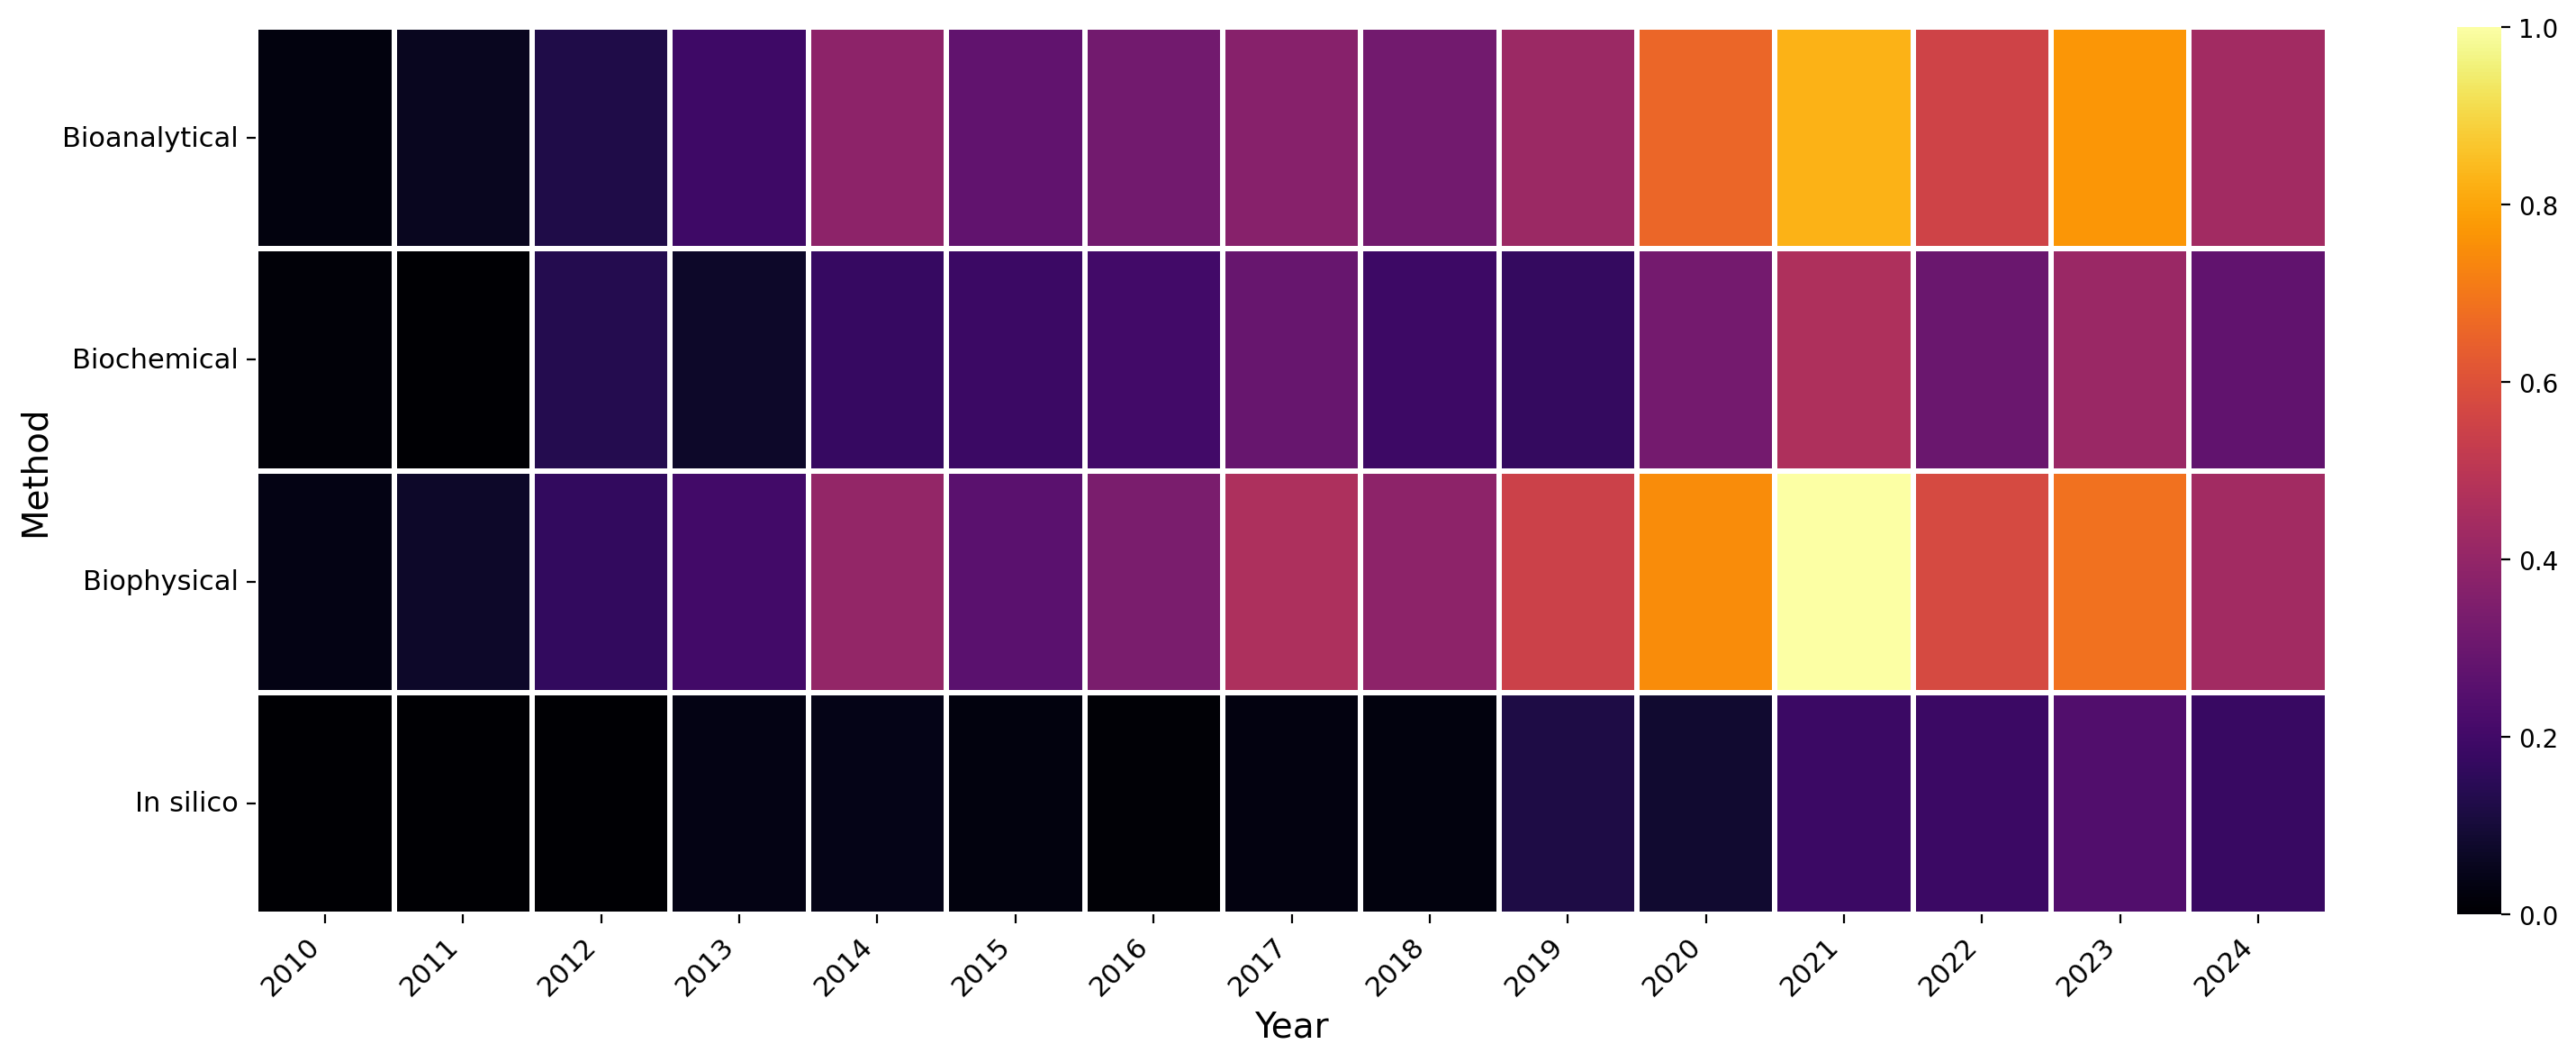

In [ ]:
# Plot the horizontal heatmap with normalized data
plt.figure(figsize=(16, 6))
sns.heatmap(normalized_heatmap_data.T, cmap="inferno", annot=False, fmt=".2f", cbar=True, linewidths=1.5, vmin=0, vmax=1) # Set vmin and vmax for colorbar
plt.xticks(rotation=45,ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=14)
plt.ylabel("Method", fontsize=14)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()

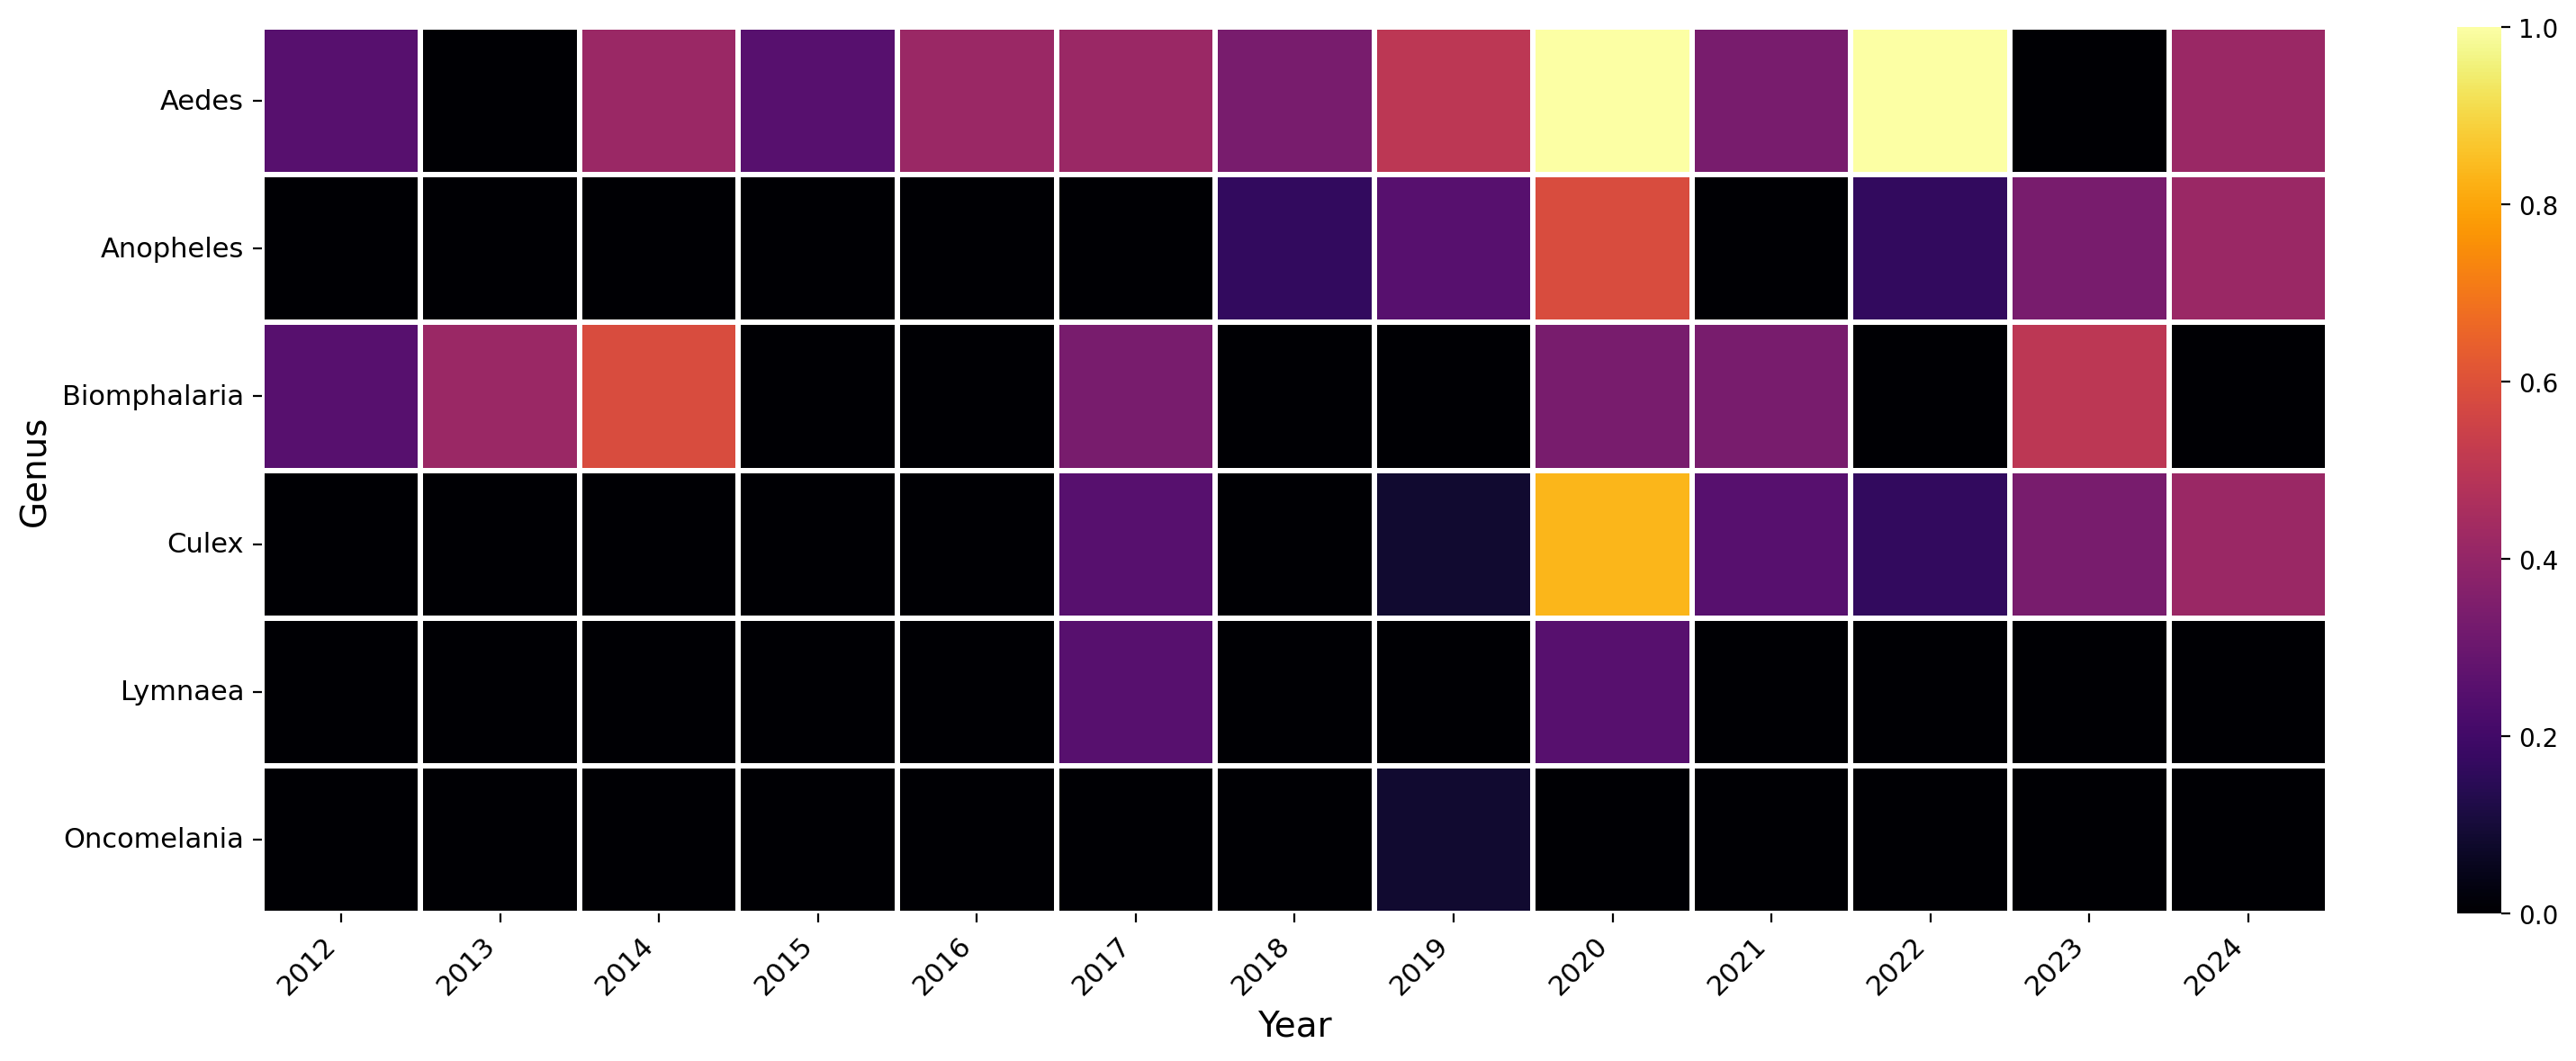

In [ ]:
# Plot the horizontal heatmap with normalized data
plt.figure(figsize=(16, 6))
sns.heatmap(normalized_heatmap_data.T, cmap="inferno", annot=False, fmt=".2f", cbar=True, linewidths=1.5, vmin=0, vmax=1) # Set vmin and vmax for colorbar
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
plt.xticks(rotation=45,ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=14)
plt.ylabel("Genus", fontsize=14)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()

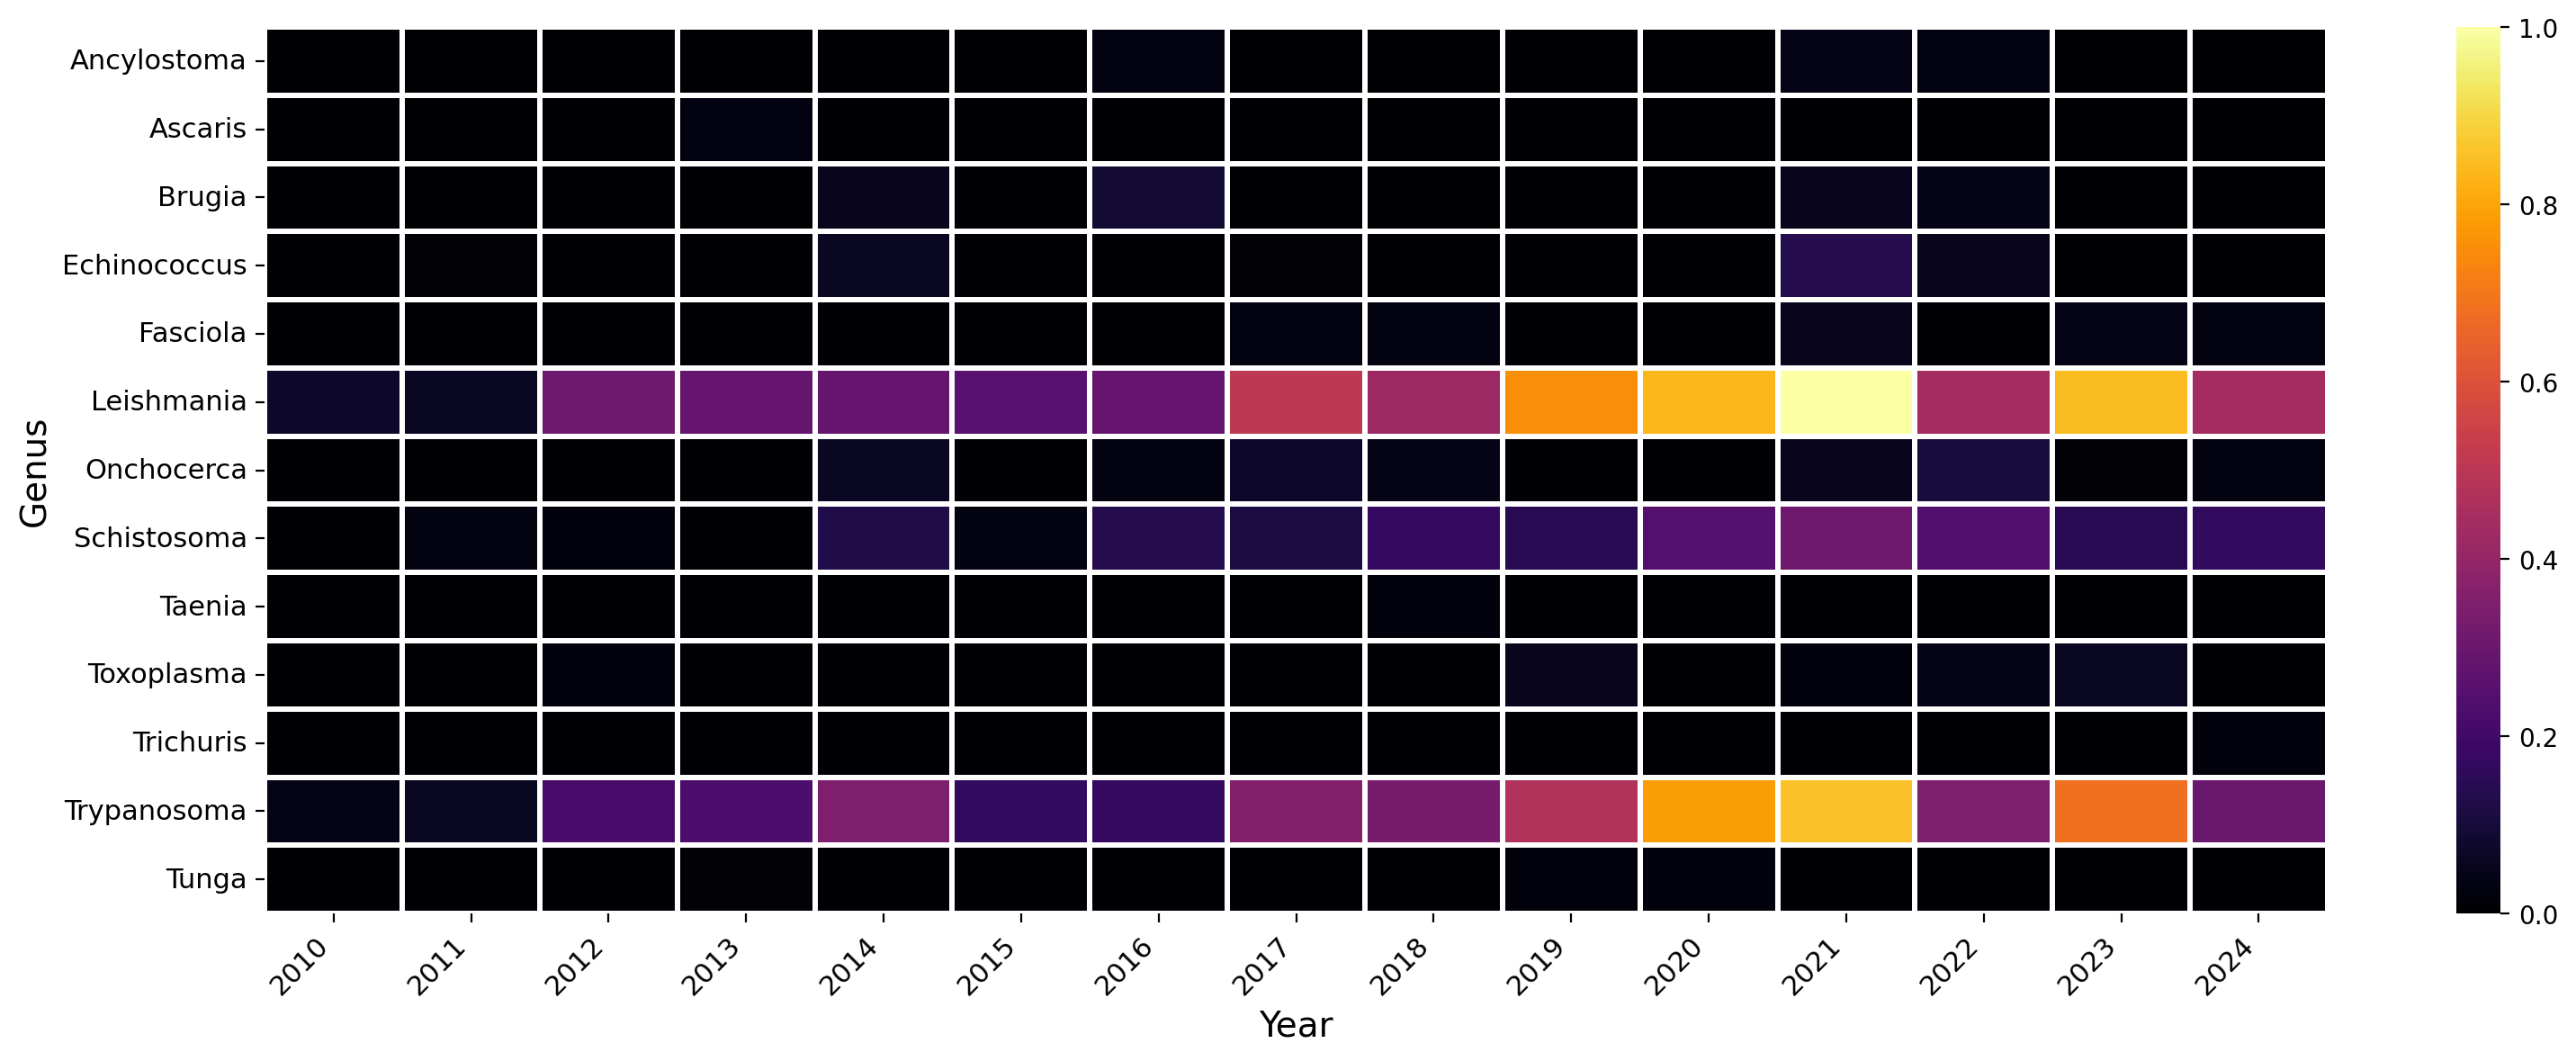

In [ ]:
# Plot the horizontal heatmap with normalized data
plt.figure(figsize=(16, 6))
sns.heatmap(normalized_heatmap_data.T, cmap="inferno", annot=False, fmt=".2f", cbar=True, linewidths=1.5, vmin=0, vmax=1) # Set vmin and vmax for colorbar
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
plt.xticks(rotation=45,ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=14)
plt.ylabel("Genus", fontsize=14)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()

PHASE 2

In [ ]:
# Load the dataset
papers = pd.read_csv("/content/3_table_1_with_abstracts.csv")
papers.head(5)

,Journal,Title,Tag1,Tag2,Tag3,Tag4,Tag5,Compound,Authors,Year,Abstract,Paper_type
0,Molecules : A Journal of Synthetic Chemistry a...,Anti-Trypanosomatid Elemanolide Sesquiterpene ...,1A,2AA,NaN,NaN,Plant extract,Sesquiterpene Lactones,"Kimani, Njogu M.; Matasyoh, Josphat C.; Kaiser...",2017,Sleeping sickness or human African trypanosomi...,['Journal Article']
1,Viruses,Antiviral and Cytotoxic Activity of Different ...,1B,2BB,NaN,NaN,Plant extract,NaN,"Panda, Sujogya Kumar; Castro, Ana HortÃªncia F...",2020,Chikungunya and yellow fever virus cause vecto...,['Journal Article']
2,Molecules,Antiprotozoal Activity of Plants Used in the M...,1A,2AA,NaN,NaN,Plant extract,"Gallic acid, methyl gallate, 2,3,4,6-tetragall...","Vahekeni, Nina; Brillatz, ThÃ©o; Rahmaty, Marj...",2024,"Folk medicine is widely used in Angola, even f...",['Journal Article']
3,Molecules,Search for Antiprotozoal Activity in Herbal Me...,1A,2AA,2AB,NaN,Plant extract,NaN,"Llurba Montesino, NÃºria; Kaiser, Marcel; Brun...",2015,"Sleeping sickness, Chagas disease, Leishmanias...",['Journal Article']
4,Plants,Medicinal Plant Preparations Administered by B...,1A,2AC,NaN,NaN,Plant extract,NaN,"Dube, Mthandazo; Raphane, Boingotlo; Sethebe, ...",2022,Schistosomiasis and soil-transmitted helminths...,['Journal Article']


In [ ]:
# Define the classification function
def classify_labels(text):
    labels = []
    patterns = {
        "Polyphenols": [
            r"(?i)polyphenols",r"(?i)phenols", r"(?i)phenolic compounds", r"(?i)phenylpropanoid",r"(?i)coumarins", r"(?i)xanthones",
            r"(?i)lignans", r"(?i)stilbenoids", r"(?i)tannins",r"(?i)quinones", r"(?i)hydroxybenzoic acids", r"(?i)hydroxycinnamic acids",
            r"(?i)ellagitannins", r"(?i)proanthocyanidins", r"(?i)phenolic compounds", r"(?i)phenols", r"(?i)polyphenolic compounds",
            r"(?i)stilbenoids", r"(?i)coumarins", r"(?i)lignan", r"(?i)aurones", r"(?i)lignoid"
        ],
        "Flavonoids": [
            r"(?i)flavonoids", r"(?i)flavones", r"(?i)anthocyanidins", r"(?i)chalcones", r"(?i)isoflavonoids",
            r"(?i)schaftoside", r"(?i)isoschaftoside", r"(?i)isoorientin", r"(?i)orientin", r"(?i)vitexin",
            r"(?i)isovitexin", r"(?i)aurones", r"(?i)flavonoids", r"(?i)flavones", r"(?i)flavanols", r"(?i)flavanones",
            r"(?i)isoflavones", r"(?i)anthocyanins", r"(?i)anthocyanidins",
            r"(?i)flavan-3-ols", r"(?i)epicatechin", r"(?i)catechin",
            r"(?i)quercetin", r"(?i)kaempferol", r"(?i)myricetin",
            r"(?i)rutin", r"(?i)apigenin", r"(?i)luteolin",
            r"(?i)genistein", r"(?i)daidzein", r"(?i)naringenin",
            r"(?i)hesperetin", r"(?i)isorhamnetin", r"(?i)procyanidins"
        ],
        "Terpenes": [
            r"(?i)terpenoids", r"(?i)terpenes", r"(?i)monoterpenoids", r"(?i)sesquiterpenoids",
            r"(?i)diterpenoids", r"(?i)triterpenoids", r"(?i)triterpenes", r"(?i)terpene", r"(?i)sesquiterpene",
            r"(?i)sesquiterpene lactone",  r"(?i)terpenes", r"(?i)monoterpenes", r"(?i)sesquiterpenes", r"(?i)diterpenes",
            r"(?i)tetraterpenes", r"(?i)polyterpenes", r"(?i)isoprene", r"(?i)terpenoids", r"(?i)geraniol", r"(?i)linalool", r"(?i)limonene", r"(?i)myrcene",
            r"(?i)pinene", r"(?i)camphor", r"(?i)eucalyptol", r"(?i)nerol", r"(?i)citronellol", r"(?i)farnesol", r"(?i)triterpene",
            r"(?i)beta-caryophyllene", r"(?i)humulene", r"(?i)squalene", r"(?i)retinoids", r"(?i)carotenoids"
        ],
        "Alkaloids": [
            r"(?i)alkaloids", r"(?i)indole alkaloids", r"(?i)isoquinoline alkaloids", r"(?i)quinoline alkaloids",
            r"(?i)piperidine alkaloids", r"(?i)steroidal alkaloids", r"(?i)miscellaneous alkaloids",
            r"(?i)alkaloid", r"(?i)indole alkaloid", r"(?i)isoquinoline",
            r"(?i)quinoline alkaloids", r"(?i)piperidine alkaloids", r"(?i)steroide alkaloid",
            r"(?i)monoterpenoid indole alkaloid", r"(?i)berberine", r"(?i)morphine",
            r"(?i)quinine", r"(?i)strychnine", r"(?i)theobromine",
            r"(?i)caffeine", r"(?i)nicotine", r"(?i)atropine",
            r"(?i)colchicine", r"(?i)codeine", r"(?i)ephedrine",
            r"(?i)ergotamine", r"(?i)lysergic acid", r"(?i)pilocarpine",
            r"(?i)scopolamine", r"(?i)reserpine"
        ],
        "Glucosides": [
            r"(?i)carbohydrates", r"(?i)sugars", r"(?i)glucosides", r"(?i)glycosides", r"(?i)cyanogenic glycosides", r"(?i)cardiac glycosides",
            r"(?i)phenolic glycosides", r"(?i)anthraquinone glycosides", r"(?i)flavonoid glycosides",
            r"(?i)saponin glycosides", r"(?i)iridoid glycosides", r"(?i)coumarin glycosides",
            r"(?i)salicin", r"(?i)amygdalin", r"(?i)arbutin", r"(?i)aucubin", r"(?i)ligustroside",
            r"(?i)strophanthin", r"(?i)gentiopicroside", r"(?i)hesperidin", r"(?i)naringin"
        ],
        "Saponins": [
            r"(?i)saponins", r"(?i)triterpenoid saponins", r"(?i)steroidal saponins",
            r"(?i)sapogenins", r"(?i)diosgenin", r"(?i)asiaticoside", r"(?i)glycyrrhizin",
            r"(?i)ginsenosides", r"(?i)escin", r"(?i)saponaria", r"(?i)saponin glycosides"
        ]
    }
    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)
    return labels

In [ ]:
# Define the labels and year range for the heatmap
selected_labels = ["Polyphenols", "Flavonoids", "Terpenes", "Alkaloids", "Glucosides", "Saponins"]

In [ ]:
# Filter the data for selected labels and year range
filtered_data = papers[(papers["Labels"].isin(selected_labels)) & (papers["Year"].isin(year_range))]

# Group by Year and Labels for heatmap data preparation
if "Year" in filtered_data.columns:
    heatmap_data = filtered_data.groupby(["Year", "Labels"]).size().unstack(fill_value=0)
else:
    print("Error: The 'Year' column does not exist in the DataFrame.")

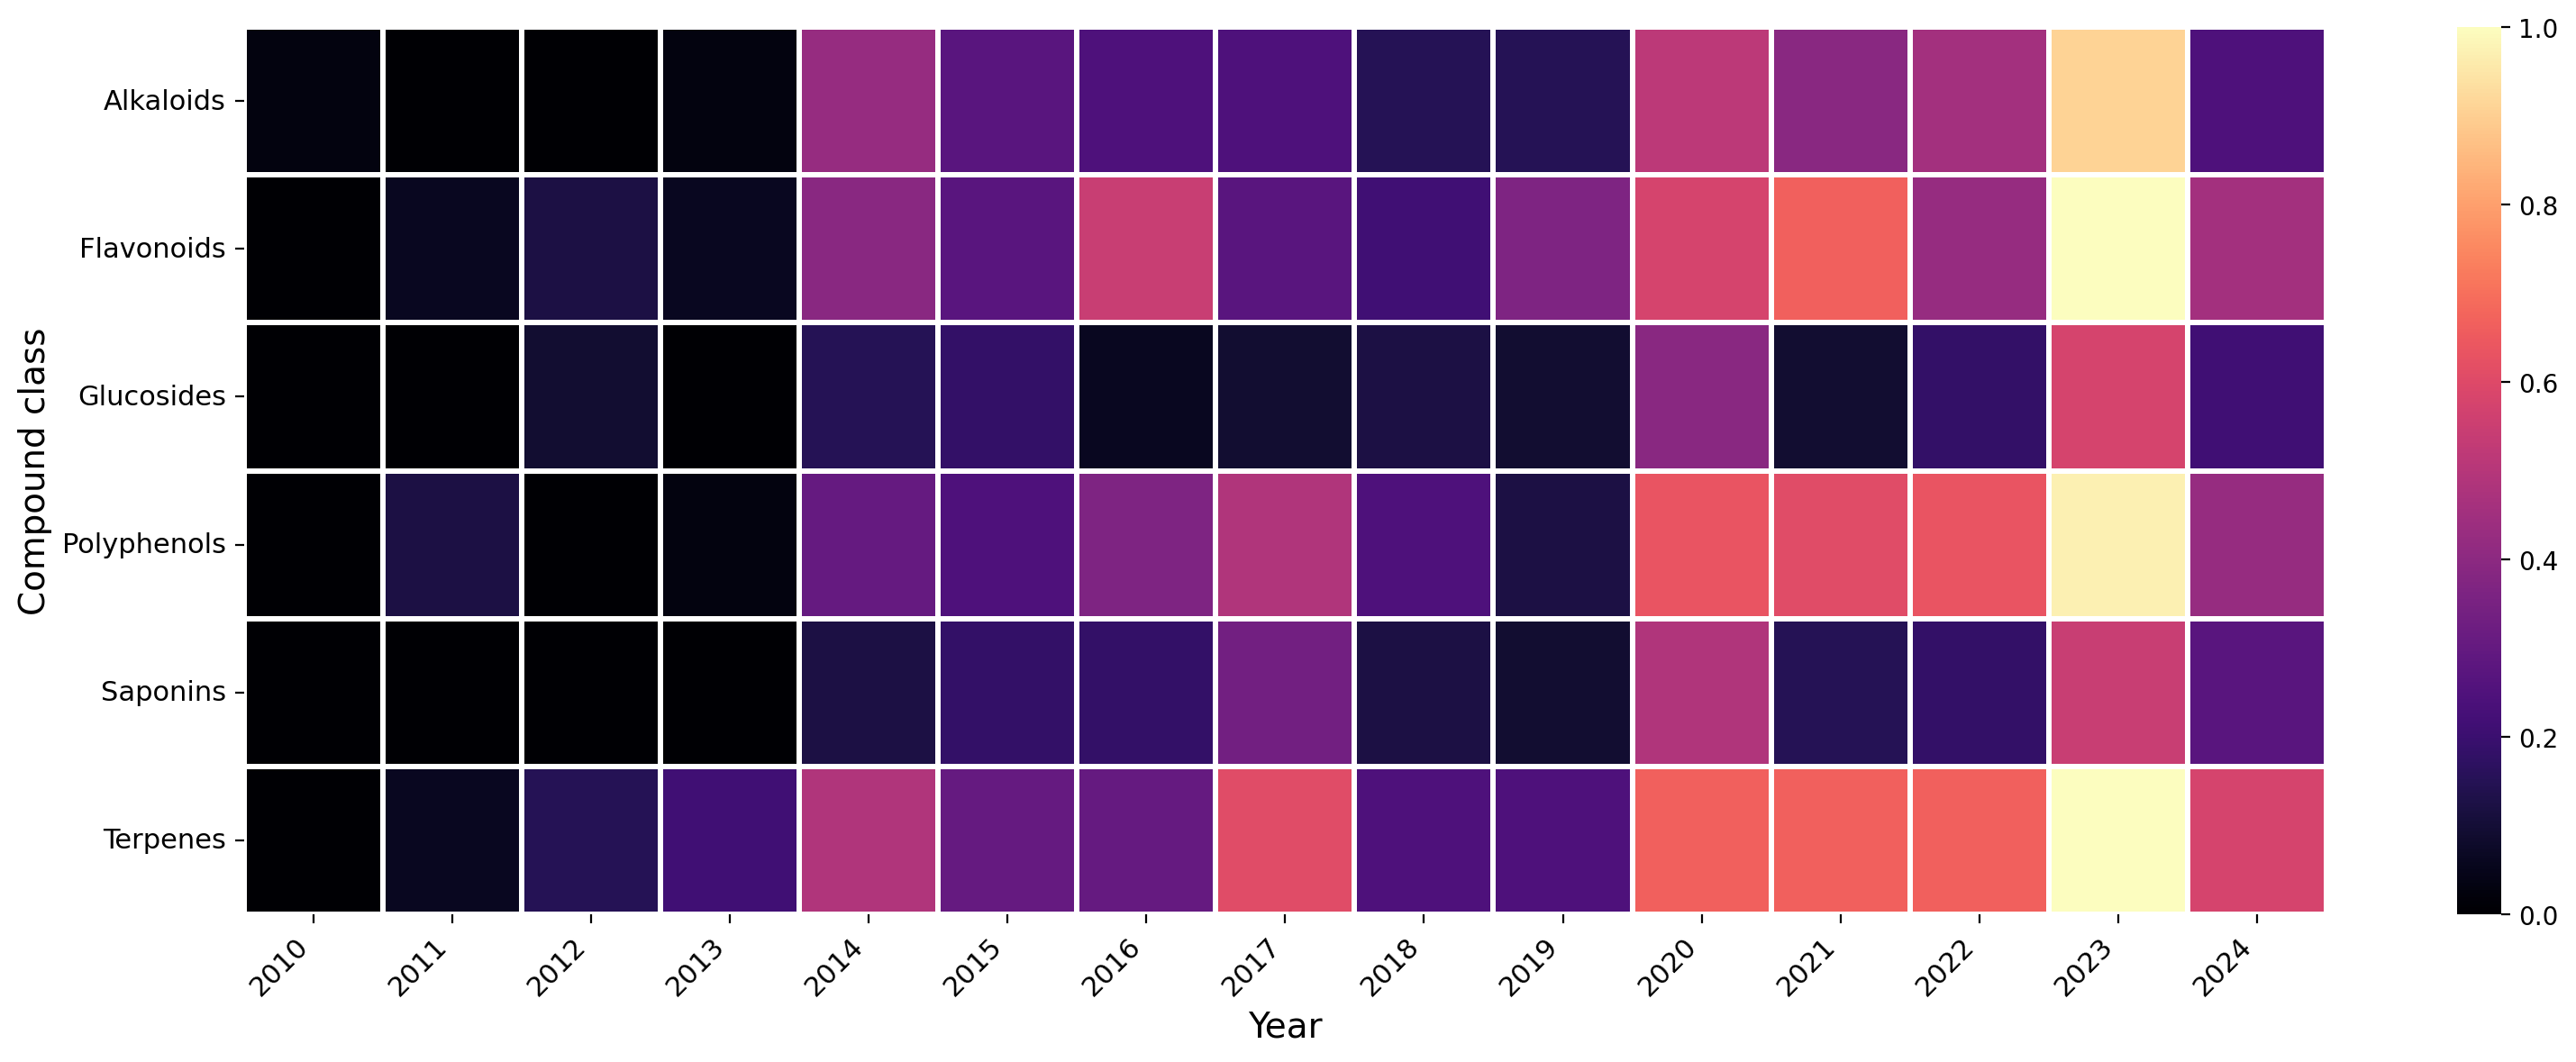

In [ ]:
# Plot the horizontal heatmap with normalized data
plt.figure(figsize=(16, 6))
sns.heatmap(normalized_heatmap_data.T, cmap="magma", annot=False, fmt=".2f", cbar=True, linewidths=1.5, vmin=0, vmax=1) # Set vmin and vmax for colorbar
#plt.title("Horizontal Heatmap of Trypanosoma and Bioanalytical Labels by Year (2010-2024)")
plt.xticks(rotation=45,ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.yticks(rotation=360, ha='right', fontsize=11)  # Rotate x-axis labels for clarity
plt.xlabel("Year", fontsize=14)
plt.ylabel("Compound class", fontsize=14)
plt.rcParams["font.family"] = "Arial"
plt.tight_layout()
plt.show()